In [1]:
from urllib.request import urlopen
from fastai.vision import *
from fastai.metrics import error_rate
from PIL import Image
#from google.colab import drive
from os import listdir
import numpy as np 
import cv2
from matplotlib import image
from matplotlib import pyplot
import numpy as np
import warnings
import pandas as pd
import os 
# start: 10:34
#from fastai import ImageDataBunch.from_folder
#from fastai import vision
#from fastai.vision import *
#from fastai.widgets import *
#from fastai.widgets import *
#from fastai.callbacks import *
import torch
import pandas as pd
#from torch import as_tensor,Tensor,ByteTensor,LongTensor,FloatTensor,HalfTensor,DoubleTensor
#import torch.nn as nn
#import torch.nn.functional as F
#from torch.utils.data import SequentialSampler,RandomSampler,Sampler,BatchSampler
#from torch.utils.data import IterableDataset,get_worker_info
#from torch.utils.data._utils.collate import default_collate,default_convert
from fastai.vision.data import ImageDataLoaders
from fastai.vision.data import *
from fastai.vision import *
#from fastai.all import *

#from fastai import Path

In [55]:
#! python3 -m pip install fastai

Klassid:

Airbus A320neo

Boeing 747-8 Intercontinental

Aviat Pitts Special S2S

Cub Crafter X Cub

Daher TBM 930

Diamond DA40NG

Diamond DA62

EXTRA 330LT



https://www.windowscentral.com/list-microsoft-flight-simulator-planes


Cloning the repository

In [ ]:
# Clone the entire repo.
!git clone -l -s git://github.com/o-bollverk/msf cloned-repo
%cd cloned-repo
!ls

fatal: destination path 'cloned-repo' already exists and is not an empty directory.
/content/cloned-repo
all_data_bw			       msf_data
all_data_color			       msf_project1.ipynb
colab				       msf_project1_mixed.ipynb
convert_images.ipynb		       random_selection_test
convert_to_bw.ipynb		       random_selection_train
data_amounts			       web_data_links
ludvig_local_msf_project1_mixed.ipynb


In [ ]:
! git pull

Already up to date.


In [2]:
nimede_vastavus = pd.DataFrame({"web_name": np.sort(listdir("all_data_color/")),
                                "game_name": np.sort(np.unique([x.split("_clear")[0] for x in listdir("msf_data/image_data_clear")]))})

In [33]:
! mkdir random_selection_train
! mkdir random_selection_test


In [34]:
# creating temporary folder for selected files
from shutil import copyfile
import random
import shutil

selection_size_web = 250
selection_size_web_test = int(0.2*selection_size_web)

def abifun(x):
    return x[:len(nimede_vastavus.game_name[i])] == nimede_vastavus.game_name[i]
 
for i in range(nimede_vastavus.shape[0]):
  web_files = listdir("all_data_color/" + nimede_vastavus.web_name[i])
  game_files_clear = listdir("msf_data/image_data_clear/")    
  game_files_clear_selected = np.array(game_files_clear)[[abifun(x) for x in game_files_clear]]
  game_files_rainy = listdir("msf_data/image_data_rainy/")
  game_files_rainy_selected = np.array(game_files_rainy)[[abifun(x) for x in game_files_rainy]]
  
  # making a random selection

  selected_web = random.sample(web_files, selection_size_web)
  selected_web2 = ["all_data_color/" + nimede_vastavus.web_name[i] + "/" + x for x in selected_web]
  selected_web2_test = selected_web2[0:selection_size_web_test]
  selected_web2_train = selected_web2[selection_size_web_test:]

  selected_clear = random.sample(set(game_files_clear_selected), int(selection_size_web/4))
  selected_clear2 = ["msf_data/image_data_clear/" + x for x in selected_clear]
  selected_clear2_test = selected_clear2[0:selection_size_web_test]
  selected_clear2_train = selected_clear2[selection_size_web_test:]

  selected_rainy = random.sample(set(game_files_rainy_selected), int(selection_size_web/4))
  selected_rainy2 = ["msf_data/image_data_rainy/" + x for x in selected_rainy]
  selected_rainy2_test = selected_rainy2[0:selection_size_web_test]
  selected_rainy2_train = selected_rainy2[selection_size_web_test:]
  
  complete_selection_train = np.concatenate([selected_web2_train, selected_clear2_train, selected_rainy2_train])
  complete_selection_test = np.concatenate([selected_web2_test, selected_clear2_test, selected_rainy2_test])

  os.mkdir("random_selection_train/" +  nimede_vastavus.game_name[i])
  for filename in complete_selection_train:
    shutil.copy(filename, "random_selection_train/" +  nimede_vastavus.game_name[i])

  os.mkdir("random_selection_test/" +  nimede_vastavus.game_name[i])
  for filename in complete_selection_test:
    shutil.copy(filename, "random_selection_test/" +  nimede_vastavus.game_name[i])



In [35]:
#np.isin(np.sort(np.array(selected_web2_test)), np.sort(np.array(selected_web2_train)))
#np.array(selected_web2_test)
#selected_web2_test
#selected_web2_train

#print(np.sort(np.array(complete_selection_train))[0:20])
#np.sort(np.array(complete_selection_test))[0:20]


['all_data_color/extra 330_color/extra 330_color_103.jpg'
 'all_data_color/extra 330_color/extra 330_color_104.jpg'
 'all_data_color/extra 330_color/extra 330_color_106.jpg'
 'all_data_color/extra 330_color/extra 330_color_108.jpg'
 'all_data_color/extra 330_color/extra 330_color_111.jpg'
 'all_data_color/extra 330_color/extra 330_color_112.jpg'
 'all_data_color/extra 330_color/extra 330_color_114.jpg'
 'all_data_color/extra 330_color/extra 330_color_116.jpg'
 'all_data_color/extra 330_color/extra 330_color_118.jpg'
 'all_data_color/extra 330_color/extra 330_color_12.jpg'
 'all_data_color/extra 330_color/extra 330_color_120.jpg'
 'all_data_color/extra 330_color/extra 330_color_122.jpg'
 'all_data_color/extra 330_color/extra 330_color_124.jpg'
 'all_data_color/extra 330_color/extra 330_color_125.jpg'
 'all_data_color/extra 330_color/extra 330_color_126.jpg'
 'all_data_color/extra 330_color/extra 330_color_127.jpg'
 'all_data_color/extra 330_color/extra 330_color_128.jpg'
 'all_data_colo

array(['all_data_color/extra 330_color/extra 330_color_10.jpg',
       'all_data_color/extra 330_color/extra 330_color_100.jpg',
       'all_data_color/extra 330_color/extra 330_color_102.jpg',
       'all_data_color/extra 330_color/extra 330_color_148.jpg',
       'all_data_color/extra 330_color/extra 330_color_149.jpg',
       'all_data_color/extra 330_color/extra 330_color_15.jpg',
       'all_data_color/extra 330_color/extra 330_color_152.jpg',
       'all_data_color/extra 330_color/extra 330_color_163.jpg',
       'all_data_color/extra 330_color/extra 330_color_166.jpg',
       'all_data_color/extra 330_color/extra 330_color_168.jpg',
       'all_data_color/extra 330_color/extra 330_color_173.jpg',
       'all_data_color/extra 330_color/extra 330_color_18.jpg',
       'all_data_color/extra 330_color/extra 330_color_188.jpg',
       'all_data_color/extra 330_color/extra 330_color_2.jpg',
       'all_data_color/extra 330_color/extra 330_color_214.jpg',
       'all_data_color/extra 3

In [51]:
#from fastai.vision import get_transforms
from pathlib import Path
import torch
import fastai
from fastai.tabular.all import *
from fastai.text.all import *
from fastai.vision.all import *
from fastai.medical.imaging import *
from fastai import *
from fastai.vision.data import *
from fastai.vision.data import ImageDataLoaders
#from fastai.vision.all import ImageDataLoaders
import torch


## Training and evaluating the model on non-augmented data

In [52]:
import warnings
warnings.filterwarnings('ignore')

train_directory = "random_selection_train"
#test_directory = "random_selection_test"
path = Path(train_directory)
#path = "/random_selection_train"
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
                                    ds_tfms=get_transforms(),
         size=224, num_workers=4).normalize(imagenet_stats)
#ds_tfms=get_transforms(),
# annab warningut 

NameError: name 'ImageDataBunch' is not defined

In [21]:
import fastai
fastai.__version__

'2.1.4'

In [ ]:
data.classes

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

### Train model

In [ ]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(5)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

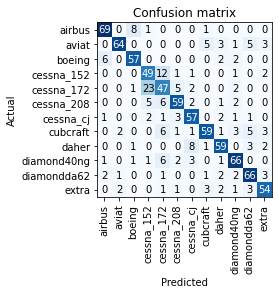

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
warnings.filterwarnings('ignore')

tulemused = []
correct_labels = []
for i in listdir("random_selection_test"):
  for j in listdir("random_selection_test" + "/" + i):
    correct_labels.append(i)
    img = open_image("random_selection_test/" + i +"/" + j)
    pred_class,pred_idx,outputs = learn.predict(img)
    vastus = data.classes[int(pred_class)]
    tulemused = np.append(tulemused, vastus)

accuracy = sum(tulemused == correct_labels)/len(correct_labels)

print("Mixed accuracy: " + str(accuracy))


Mixed accuracy: 0.8861111111111111


In [ ]:
predictions = pd.DataFrame({"correct": correct_labels, "prediction": tulemused}).sort_values("correct")
predictions[predictions.correct != predictions.prediction]

,correct,prediction
404,airbus,cessna_172
411,airbus,boeing
415,airbus,cubcraft
360,airbus,cessna_208
361,airbus,boeing
...,...,...
1620,extra,cessna_172
1635,extra,daher
1582,extra,cessna_172
1606,extra,cessna_152


## Adding image augmentation (creating separate folders)

### Background elimination



In [ ]:
#!pip install rembg
from rembg.bg import remove


TypeError: ignored

In [ ]:
# Transformation functions
img_raw = tf.io.read_file(input_folder + folder_name + filename)
      
def mean_transform(img_raw):
      img = tf.io.decode_image(img_raw)
      img = tf.image.convert_image_dtype(img, tf.float32)
      mean = tfa.image.mean_filter2d(img, filter_shape=5)
      return mean

def wrap_transform(img_raw):
      img = tf.io.decode_image(img_raw)
      flow_shape = [1, input_img.shape[1], input_img.shape[2], 2]
      init_flows = np.float32(np.random.normal(size=flow_shape) * 2.0)
      dense_img_warp = tfa.image.dense_image_warp(input_img, init_flows)
      dense_img_warp = tf.squeeze(dense_img_warp, 0)
      return dense_img_warp

def random_hsv(img_raw):
    img = tf.io.decode_image(img_raw)
    delta = 0.5
    lower_saturation = 0.1
    upper_saturation = 0.9
    lower_value = 0.2
    upper_value = 0.8
    rand_hsvinyiq = tfa.image.random_hsv_in_yiq(img, delta, lower_saturation, upper_saturation, lower_value, upper_value)
    return rand_hsvinyiq

def rotate(img_raw):
    rotated = tfa.image.rotate(img, tf.constant(np.pi/8))
    return rotated

input_img = tf.image.convert_image_dtype(tf.expand_dims(img, 0), tf.dtypes.float32)



UsageError: Line magic function `%paste` not found.


In [ ]:
import tensorflow as tf
import numpy as np
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
from PIL import Image

# With the entire training set and training after that:
# No resizing at this point

def image_folder_mean_filter(input_folder, output_folder, method):
  
  input_folder = input_folder + "/"
  output_folder = output_folder + "/"
  folders = listdir(input_folder)
  if os.path.isdir(output_folder) == False:
    try: 
      os.mkdir(output_folder)
    except OSError:
      print("Creation of the directory '" + output_folder + "' failed")

  for folder_name in folders:
    folder_name = folder_name + "/"
    files_in_folder = listdir(input_folder + folder_name)

    if os.path.isdir(output_folder + folder_name) == False:
      try: 
        os.mkdir(output_folder + folder_name)
      except OSError:
        print("Creation of the directory '" + output_folder + folder_name + "' failed")

    for filename in files_in_folder:
      img_raw = tf.io.read_file(input_folder + folder_name + filename)
      if method == "mean":
        transformed_result = mean_transform(img_raw)
      elif method == "wrap":
        transformed_result = wrap_transform(img_raw)
      elif method == "random_hsv"
        transformed_result = random_hsv(img_raw)
      elif method == "rotate"
        transformed_result = rotate(img_raw)

      tf.keras.preprocessing.image.save_img( output_folder + folder_name + filename, transformed_result)

image_folder_mean_filter("random_selection_train", "random_selection_train_mean")


In [ ]:
# Creating the folder random_selection_train_mean

image_folder_mean_filter("random_selection_train", "random_selection_train_mean")

# Creating the folder random_selection_test_mean

image_folder_mean_filter("random_selection_test", "random_selection_test_mean")


In [ ]:
input_img = tf.image.convert_image_dtype(tf.expand_dims(img, 0), tf.dtypes.float32)
flow_shape = [1, input_img.shape[1], input_img.shape[2], 2]
init_flows = np.float32(np.random.normal(size=flow_shape) * 2.0)
dense_img_warp = tfa.image.dense_image_warp(input_img, init_flows)
dense_img_warp = tf.squeeze(dense_img_warp, 0)
_ = plt.imshow(dense_img_warp)


In [ ]:
print(os.path.isdir("random_selection_train_mean"))
print(os.path.isdir("random_selection_test_mean"))

True

## Training and evaluating on augmented data

In [ ]:
train_directory = "random_selection_train_mean"
test_directory = "random_selection_test_mean"

path = Path(train_directory)


Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,accuracy,time
0,2.411371,1.387126,0.567447,12:31
1,1.728031,1.130117,0.625418,12:33


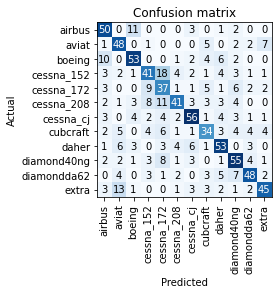

In [ ]:
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit_one_cycle(2)

interp = ClassificationInterpretation.from_learner(learn)

interp.plot_confusion_matrix()

In [ ]:
warnings.filterwarnings('ignore')

tulemused = []
correct_labels = []
image_locs = []

for i in listdir(test_directory):
  for j in listdir(test_directory + "/" + i):
    image_loc = test_directory + "/" + i +"/" + j
    image_locs.append(image_loc)
    correct_labels.append(i)
    img = open_image(test_directory + "/" + i +"/" + j)
    pred_class,pred_idx,outputs = learn.predict(img)
    vastus = data.classes[int(pred_class)]
    tulemused = np.append(tulemused, vastus)

accuracy = sum(tulemused == correct_labels)/len(correct_labels)

print("Mixed accuracy: " + str(accuracy))


Mixed accuracy: 0.7294444444444445


In [ ]:
predictions = pd.DataFrame({"correct": correct_labels, "prediction": tulemused}).sort_values("correct")
predictions[predictions.correct != predictions.prediction]

,correct,prediction
1596,airbus,diamond40ng
1599,airbus,diamond40ng
1600,airbus,cessna_cj
1605,airbus,cessna_cj
1606,airbus,boeing
...,...,...
256,extra,diamondda62
252,extra,cubcraft
249,extra,diamondda62
248,extra,aviat


## Visualizing misclassified examples

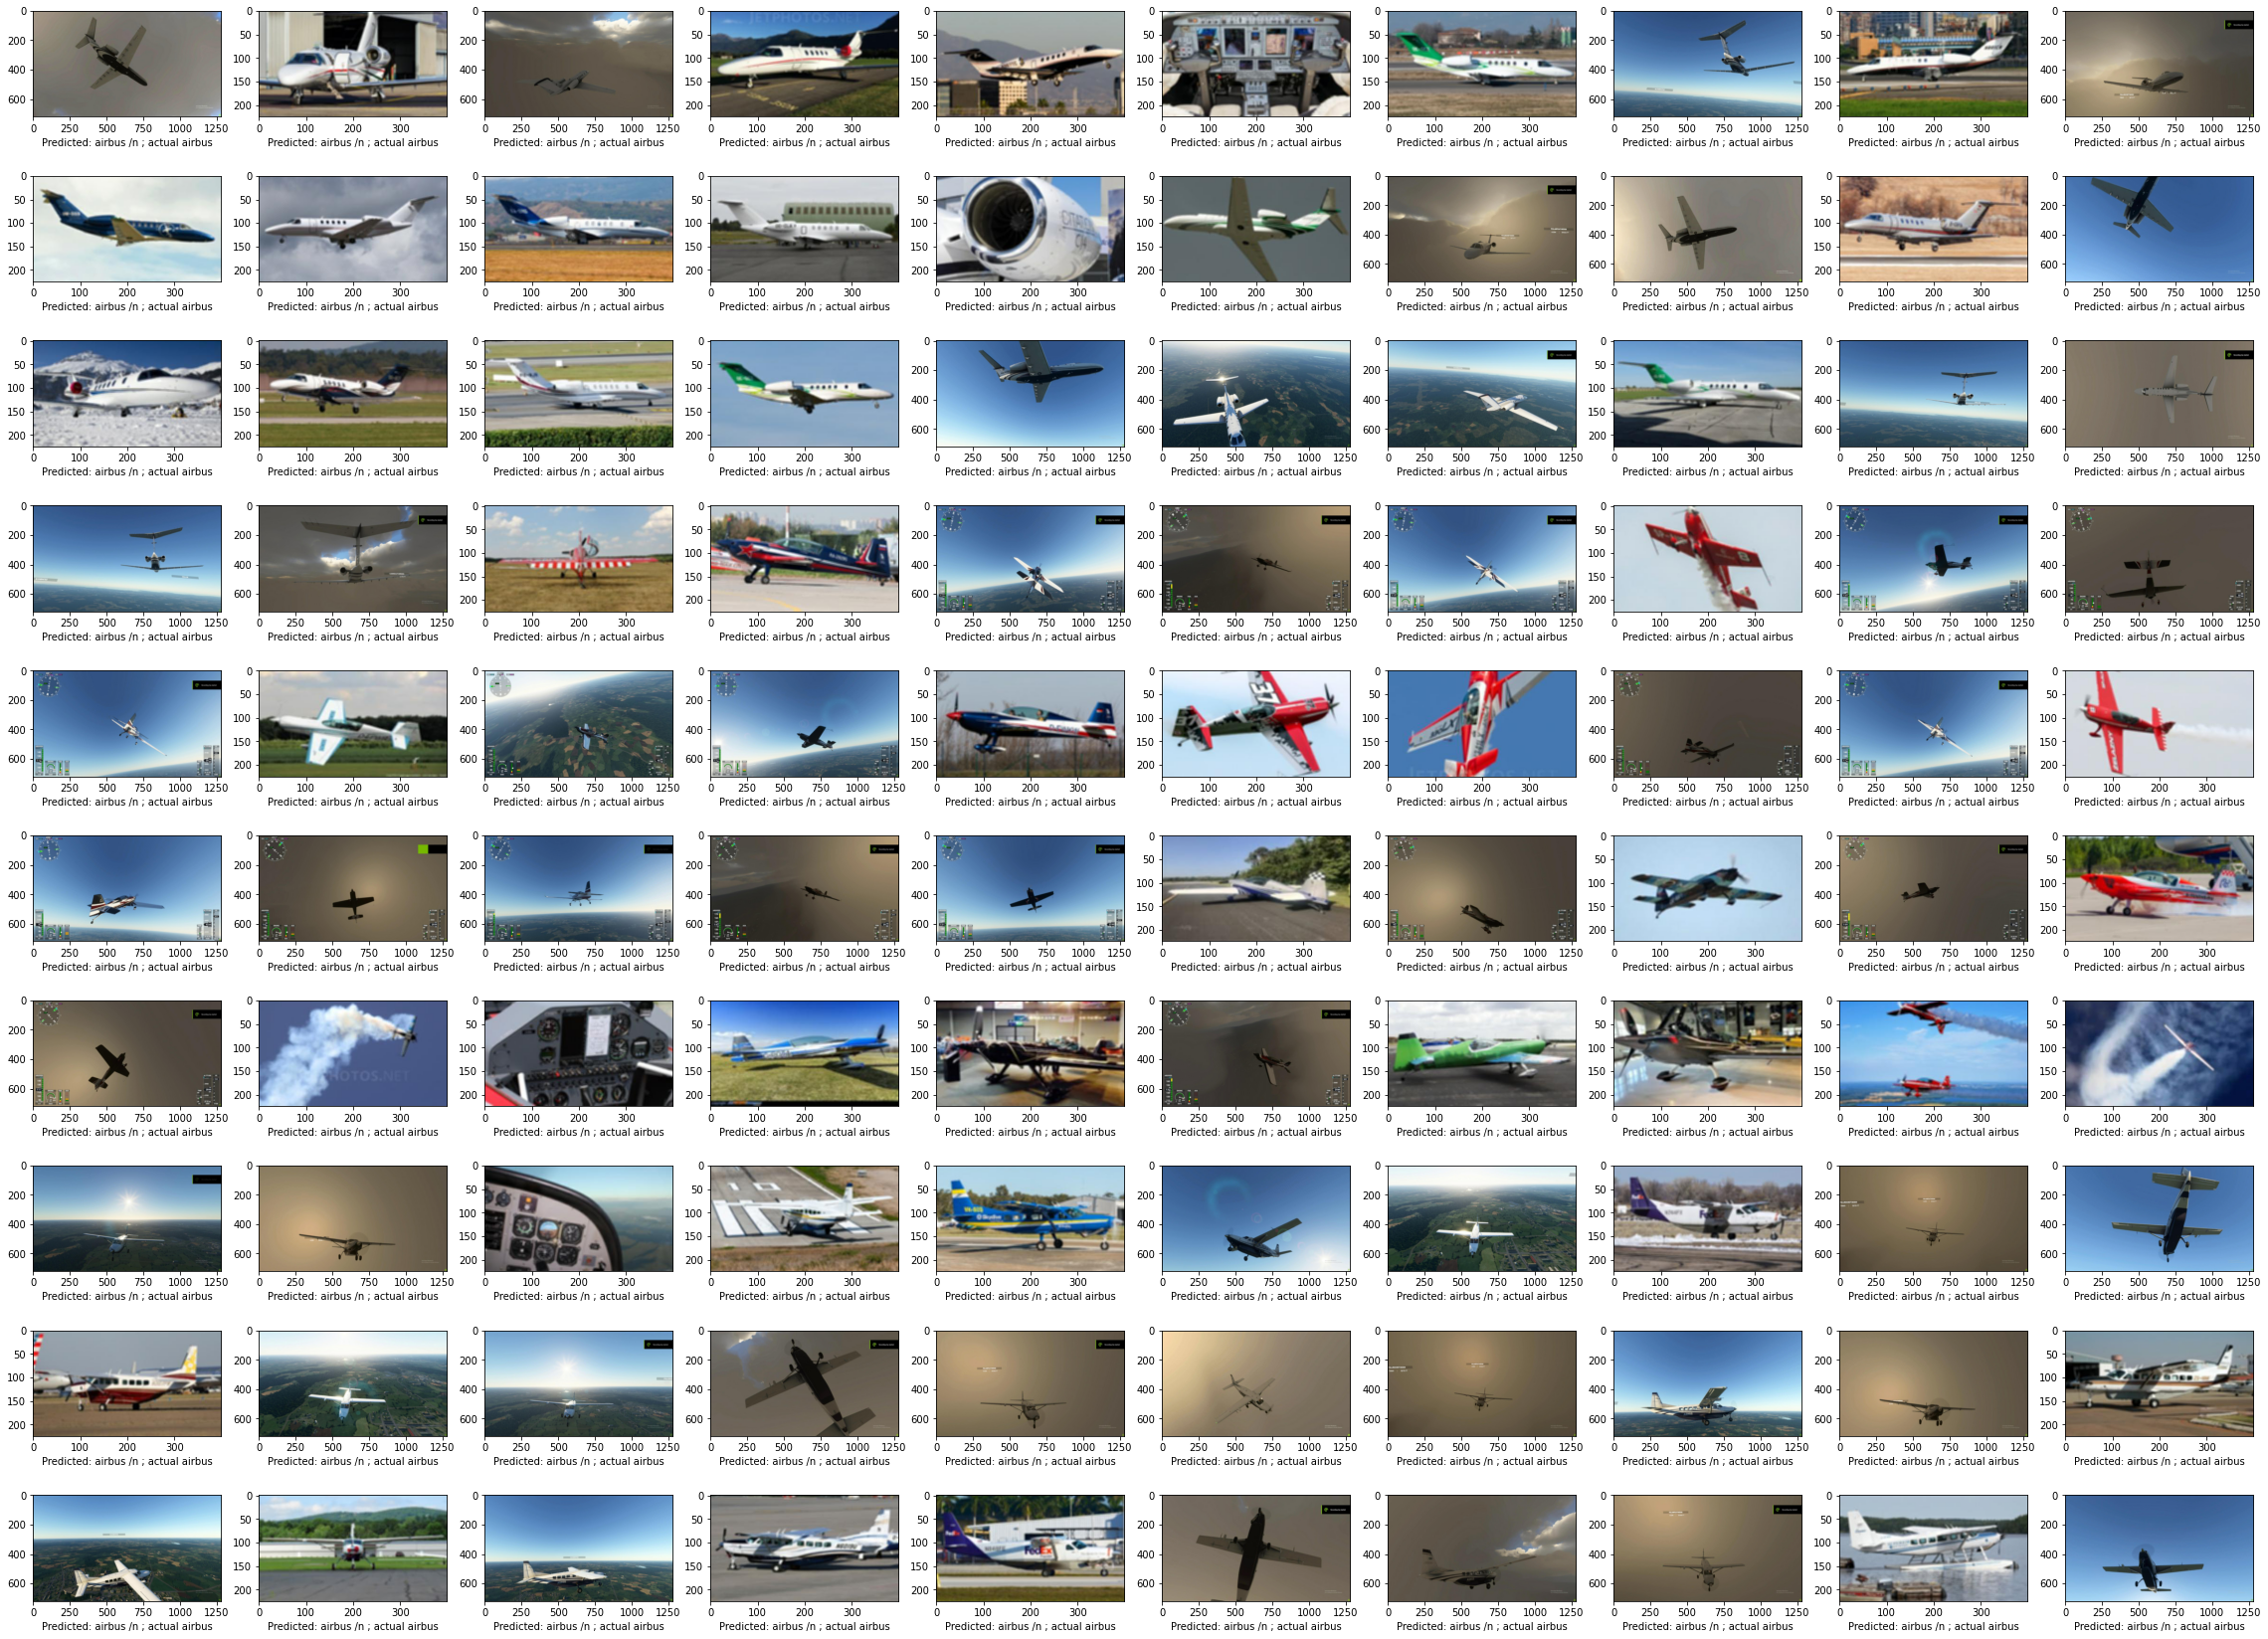

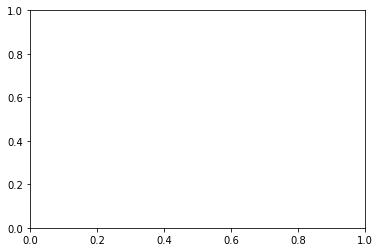

In [ ]:
veerge = 8
ridu = 8
fig, axs = plt.subplots(ridu, veerge, figsize = (50, 40))
plt.subplots()
counter = 0
predictions_wrong = predictions[predictions.correct != predictions.prediction]

for row in axs:
  for col in row:
      counter = counter + 1
      col.imshow(Image.open(np.array(image_locs)[tulemused != correct_labels][counter]))     
      col.set_xlabel("Predicted: " + predictions_wrong.iloc[counter,:].prediction + "; actual " + predictions_wrong.iloc[i,].correct)
